## Ejemplo 5: Regresión Lineal Simple

### 1. Objetivos:
    - Entender el concepto detrás de la regresión lineal simple y cómo entrenar un modelo usando scikit-learn
 
---
    
### 2. Desarrollo:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### a) Teoría

El coeficiente de correlación de Pearson cuantifica la fuerza y la dirección de la relación entre dos variables. La dirección se representa con el signo de nuestro resultado, mientras que la fuerza depende de qué tan cerca de -1 o 1 esté nuestro valor. Como ya dijimos antes, en el coeficiente de correlación de Pearson la variable `x` y la variable `y` son intercambiables.

La Regresión Linear Simple, en cambio, lo que intenta hacer es encontrar una función que nos permita predecir una de las variables a partir de la otra.

---

Lo primero que tenemos que hacer es decidir cuál va a ser nuestra variable independiente y cuál la dependiente. La variable independiente es la que se usa para predecir a la otra; le llamamos independiente porque podemos cambiarla sin condición alguna. La variable dependiente es la variable que queremos predecir; la llamamos dependiente porque estamos asumiendo que el valor que tome 'depende' del valor de la otra variable. Si usamos una gráfica de dispersión para graficar ambas variables, la variable independiente se grafica en el eje `x` y la dependiente en el eje `y`. Para ejemplificar, imaginemos que tenemos un dataset que se ve así:

In [2]:
serie_1 = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])
serie_2 = pd.Series([2, 1, 7.8, 3, 19, 10, 14.7, 18, 19.3, 24.5, 20.5, 21, 23.8, 34.4, 18, 48.3, 32.7, 34, 41, 30.3, 20, 32, 48, 29, 45, 53, 63, 43, 54, 48])

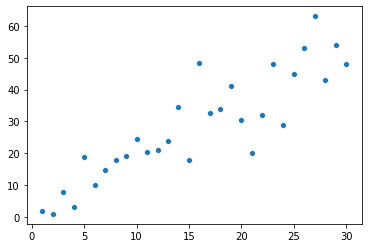

In [3]:
sns.scatterplot(serie_1, serie_2);

Lo primero que vale la pena hacer es sacar el coeficiente de correlación de Pearson entre ambas variables. Esto nos dará un indicador de la existencia (o inexistencia) de una relación entre las variables y de la fuerza de esta relación:

In [4]:
serie_1.corr(serie_2)

0.8849529343548095

Con un coeficiente como éste, es evidente que la relación entre las variables es fuerte. Vale la pena entonces intentar usar la Regresión Linear Simple para predecir la variable `y` a partir de la `x`.

- Llamamos 'modelo' al conjunto de algoritmos y parámetros que determinan de qué manera buscar y encontrar la función predictiva.
- En este caso nuestro modelo es una Regresión Linear Simple con ciertas características.
- Entrenamos un modelo para obtener la función predictiva.
- Esta función puede ser utilizada para construir una línea sobre un plano y representar visualmente la manera como nuestro modelo entrenado realiza las predicciones.

Una línea se ve así:

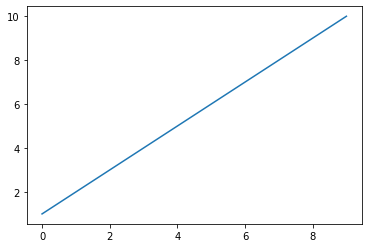

In [5]:
serie_3 = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

sns.lineplot(data=serie_3);

La ecuación de una línea recta como ésta tiene la siguiente forma:

`y = mx + b`

Entonces para predecir `y` tomamos nuestro valor `x`, lo multiplicamos por el valor `m` y le sumamos `b`. El proceso de entrenamiento de nuestro modelo lo que pretende es encontrar los valores más adecuados para `m` y `b` que minimicen nuestros errores de predicción.

---

Vamos a utilizar el modelo que viene incluido en la librería `scikit-learn` para entrenarlo:

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lr = LinearRegression()

# Usamos `to_frame` para convertir nuestra Serie en una estructura de 2 dimensiones, como lo requiere el modelo
lr.fit(serie_1.to_frame(), serie_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Usando nuestro modelo entrenado, usamos de nuevo nuestra variable `x` para intentar predecir `y`:

In [8]:
y_predict = lr.predict(serie_1.to_frame())

Graficamos ahora nuestros `y` originales (azul) y los `y` predecidos (naranja):

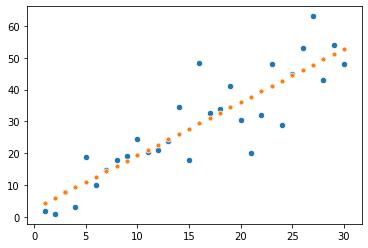

In [9]:
sns.scatterplot(serie_1, serie_2, s=40);
sns.scatterplot(serie_1, y_predict, s=25);

Como puedes ver, cada punto azul tiene su "correspondiente" punto naranja. Algunos puntos azules y naranjas quedan exactamente en el mismo lugar (la predicción fue correcta), mientras que algunos quedan algo lejos (la predicción no fue acertada). El margen de error se visualiza en esta siguiente gráfica como una serie de líneas verdes fragmentadas:

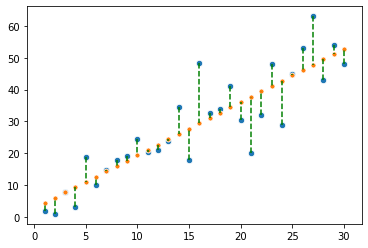

In [10]:
sns.scatterplot(serie_1, serie_2, s=40);
sns.scatterplot(serie_1, y_predict, s=25);

for i in range(len(serie_1)):
    plt.plot([serie_1[i], serie_1[i]], [serie_2[i], y_predict[i]], 'g--')

Seguramente ya habrás notado que los puntos naranjas forman una línea:

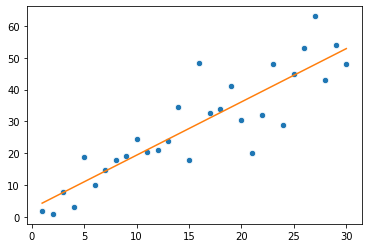

In [11]:
sns.scatterplot(serie_1, serie_2, s=40);
sns.lineplot(serie_1, y_predict, color='#FF7F0E');

Podemos extraer la ecuación de la línea de nuestro modelo entrenado de esta manera:

In [12]:
intercept = lr.intercept_
coefficient = lr.coef_[0]

Y por lo tanto, nuestra función predictiva es la siguiente:

In [13]:
print(f'y = {coefficient} * x + {intercept}')

y = 1.6723248053392656 * x + 2.6889655172413818


Podemos comprobarlo de esta manera:

In [14]:
print(f'Valor de x: {serie_1[10]}')
print(f'Valor predecido por nuestro modelo: {y_predict[10]}')
print(f'Valor cuantificado directamente usando la funcion: {coefficient * serie_1[10] + intercept}')

Valor de x: 11
Valor predecido por nuestro modelo: 21.084538375973302
Valor cuantificado directamente usando la funcion: 21.084538375973302


Para finalizar: ¿cómo cuantificamos con un valor la efectividad de nuestro modelo? Podemos usar el **coeficiente de determinación** o **R<sup>2</sup> (R al cuadrado)**. Este coeficiente nos dice qué proporción de la variabilidad de `y` puede ser explicada usando la variable `y`. En el caso de la Regresión Linear Simple, R<sup>2</sup> se puede obtener elevando al cuadrado el coeficiente de correlación de Pearson:

In [15]:
print(f'R2: {np.power(serie_1.corr(serie_2), 2)}')

R2: 0.7831416960231877


Usando el método `score` de nuestro modelo, podemos obtener el coeficiente directamente de nuestro modelo entrenado:

In [16]:
print(f'R2: {lr.score(serie_1.to_frame(), serie_2)}')

R2: 0.7831416960231877


### b) Práctica

Vamos a ver un ejemplo práctico utilizando nuestro dataset anterior.

In [17]:
df = pd.read_csv('../../Datasets/diabetes-clean.csv', index_col=0)

df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
df = df[['skin_thickness', 'bmi']]

In [19]:
df.isna().sum()

skin_thickness    0
bmi               0
dtype: int64

In [20]:
df = df[df > 0]

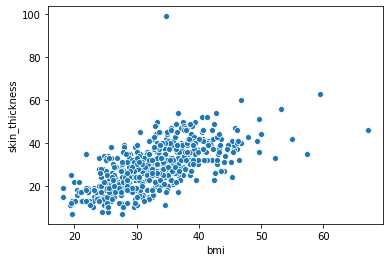

In [21]:
sns.scatterplot(df['bmi'], df['skin_thickness']);

In [22]:
df = df[df['skin_thickness'] < 80]
df = df[df['bmi'] < 60]

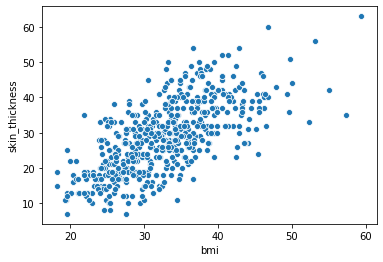

In [23]:
sns.scatterplot(df['bmi'], df['skin_thickness']);

In [24]:
df = df.dropna()

In [25]:
df['bmi'].corr(df['skin_thickness'])

0.6752529282935311

In [26]:
lr = LinearRegression()

lr.fit(df['bmi'].to_frame(), df['skin_thickness'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
y_predict = lr.predict(df['bmi'].to_frame())

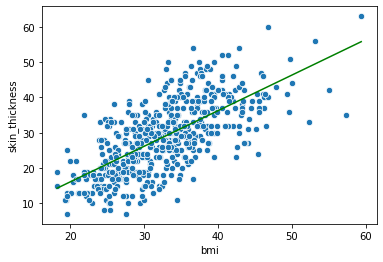

In [28]:
sns.scatterplot(df['bmi'], df['skin_thickness'], s=40);
sns.lineplot(df['bmi'], y_predict, color='g');

In [29]:
lr.score(df['bmi'].to_frame(), df['skin_thickness'])

0.4559665171689885

En este caso decimos entonces que nuestra variable 'bmi' explica el 45.6% de la variabilidad de nuestra variable 'skin_thickness'. Todavía tenemos algunos valores en ambas variables que tal vez podrían ser considerados valores atípicos, pero es difícil tomar esa decisión sin saber más al respecto del tema.

Este R<sup>2</sup> no es maravilloso, pero tampoco es tan terrible. Recuerda que realizar predicciones en el mundo real es extremadamente difícil.